In [1]:
import numpy as np
import pandas as pd
#from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import Normalizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('/Data_Science/Kurs_project_task/train.csv')

In [4]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [5]:
data.shape

(10000, 20)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.4+ MB


##### Очистка Ecology_2 и Ecology_3 и Shops_2

In [7]:
data['Ecology_2'].value_counts().sort_index()

A      97
B    9903
Name: Ecology_2, dtype: int64

In [8]:
data.loc[data['Ecology_2'] == 'A', 'Ecology_2'] = 0
data.loc[data['Ecology_2'] == 'B', 'Ecology_2'] = 1

In [9]:
data['Ecology_3'].value_counts().sort_index()

A     275
B    9725
Name: Ecology_3, dtype: int64

In [10]:
data.loc[data['Ecology_3'] == 'A', 'Ecology_3'] = 0
data.loc[data['Ecology_3'] == 'B', 'Ecology_3'] = 1

In [11]:
data['Shops_2'].value_counts().sort_index()

A     825
B    9175
Name: Shops_2, dtype: int64

In [12]:
data.loc[data['Shops_2'] == 'A', 'Shops_2'] = 0
data.loc[data['Shops_2'] == 'B', 'Shops_2'] = 1

In [13]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,1,1,33,7976,5,NaN,0,11,1,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,1,1,46,10309,1,240.0,1,16,1,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,1,1,34,7759,0,229.0,1,3,1,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,1,1,23,5735,3,1084.0,0,5,1,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,1,1,35,5776,1,2078.0,2,4,1,150226.531644


##### Очистка HouseYear

In [14]:
data.loc[(data['HouseYear'] < 1900) | (data['HouseYear'] > 2020), :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,1,1,30,6141,10,262.0,3,6,1,254084.534396
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,1,1,25,4756,16,2857.0,5,8,1,243028.603096


In [15]:
data.loc[data['Id'] == 10814, 'HouseYear'] = 2011
data.loc[data['Id'] == 11607, 'HouseYear'] = 1968

In [16]:
data.loc[(data['HouseYear'] < 1900) | (data['HouseYear'] > 2020), :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [17]:
#data['HouseYear'].value_counts().sort_index()

##### Очистка Floor и HouseFloor

In [18]:
data = data.astype({'HouseFloor' : int})

In [19]:
data['HouseFloor'].value_counts().sort_index()

0       269
1       497
2        48
3       127
4       134
5      1031
6        58
7        59
8       141
9      1389
10      135
11       28
12     1074
13       27
14      625
15      123
16      576
17     2331
18       89
19      108
20      105
21       33
22      343
23       40
24      176
25      374
26        1
27        6
28        3
29        1
30       21
31        1
32        4
36        1
37        4
38        1
39        2
40        7
44        1
45        1
47        1
48        2
99        2
117       1
Name: HouseFloor, dtype: int64

In [20]:
data.loc[(data['HouseFloor'] > 50), :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
6131,10806,5,1.0,51.944587,48.709601,1.0,6,99,1977,0.150818,1,1,16,3433,4,2643.0,4,5,1,296127.115515
8599,9300,74,2.0,71.747869,74.579809,9.0,5,99,1977,0.075779,1,1,6,1437,3,NaN,0,2,1,243329.912579
8854,78,30,2.0,65.773749,66.811789,1.0,8,117,1977,0.000078,1,1,22,6398,141,1046.0,3,23,1,207248.370520


In [21]:
data.loc[data['HouseFloor'] == 99, 'HouseFloor'] = 9
data.loc[data['HouseFloor'] == 117, 'HouseFloor'] = 11

In [22]:
data.loc[(data['HouseFloor'] > 50), :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [23]:
data.loc[(data['Floor'] > data['HouseFloor']), :].shape[0]

1825

In [24]:
data.loc[(data['Floor'] > data['HouseFloor']), 'HouseFloor'] = data['Floor']

In [25]:
data.loc[(data['Floor'] > data['HouseFloor']), :].shape[0]

0

In [26]:
#data['HouseFloor'].value_counts().sort_index()

##### Очистка Square

In [27]:
data.loc[(data['LifeSquare'] > data['Square']), :].shape[0]

482

In [28]:
data.loc[(data['LifeSquare'] > data['Square']), 'Square'] = data['LifeSquare']

In [29]:
data.loc[(data['LifeSquare'] > data['Square']), :].shape[0]

0

#### Построение моделей

In [30]:
train, valid = train_test_split(data, test_size=0.3, random_state=42)

In [31]:
train.shape, valid.shape

((7000, 20), (3000, 20))

In [32]:
data.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [33]:
fts = ['DistrictId', 'Square', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_2', 'Ecology_3', 'Shops_2']

### KNN_Regressor

In [34]:
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [35]:
knn_vals = np.arange(5, 100, 5)

In [36]:
r2_valid_knn = []
r2_train_knn = []
mse_valid_knn = []
mse_train_knn = []
for val in knn_vals:
    klr = KNN(n_neighbors=val)
    klr.fit(train.loc[:, fts], train['Price'])
    klr_pred = klr.predict(train.loc[:, fts])
    klr_pred_valid = klr.predict(valid.loc[:, fts])
    r2_train_knn.append(r2(train['Price'], klr_pred ))
    r2_valid_knn.append(r2(valid['Price'], klr_pred_valid))
    mse_train_knn.append(mse(train['Price'], klr_pred))
    mse_valid_knn.append(mse(valid['Price'], klr_pred_valid))

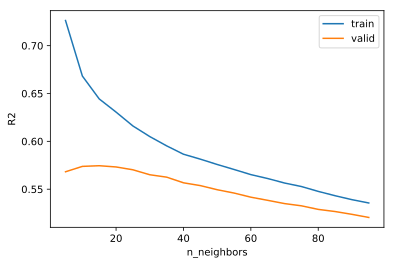

In [37]:
plt.plot(knn_vals, r2_train_knn)
plt.plot(knn_vals, r2_valid_knn)
plt.xlabel('n_neighbors')
plt.ylabel('R2')
plt.legend(['train', 'valid'])
plt.show()

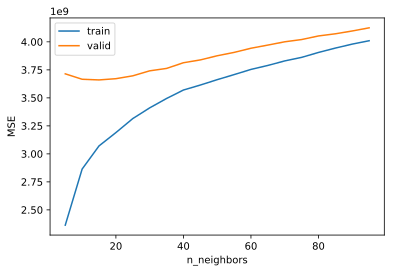

In [38]:
plt.plot(knn_vals, mse_train_knn)
plt.plot(knn_vals, mse_valid_knn)
plt.xlabel('n_neighbors')
plt.ylabel('MSE')
plt.legend(['train', 'valid'])
plt.show()

### RandomForestRegressor

In [39]:
rfr_vals = np.arange(10, 300, 10)

In [40]:
rfr = RF(random_state=42)
r2_valid_rfr = []
r2_train_rfr = []
mse_valid_rfr = []
mse_train_rfr = []
for val in rfr_vals:
    rfr = RF(n_estimators=val, min_samples_leaf=3, random_state=42)
    rfr.fit(train.loc[:, fts], train['Price'])
    rfr_pred = rfr.predict(train.loc[:, fts])
    rfr_pred_valid = rfr.predict(valid.loc[:, fts])
    r2_train_rfr.append(r2(train['Price'], rfr_pred ))
    r2_valid_rfr.append(r2(valid['Price'], rfr_pred_valid))
    mse_train_rfr.append(mse(train['Price'], rfr_pred))
    mse_valid_rfr.append(mse(valid['Price'], rfr_pred_valid))

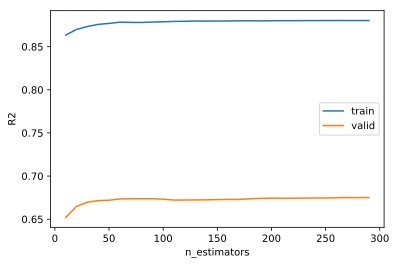

In [41]:
plt.plot(rfr_vals, r2_train_rfr)
plt.plot(rfr_vals, r2_valid_rfr)
plt.xlabel('n_estimators')
plt.ylabel('R2')
plt.legend(['train', 'valid'])
plt.show()

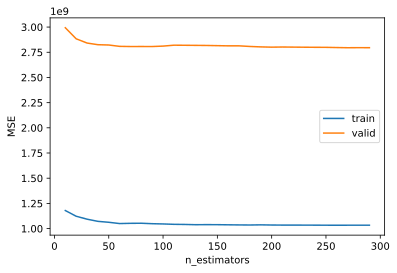

In [42]:
plt.plot(rfr_vals, mse_train_rfr)
plt.plot(rfr_vals, mse_valid_rfr)
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.legend(['train', 'valid'])
plt.show()

In [43]:
rfr.fit(train.loc[:, fts], train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=290, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [44]:
rfr_pred = rfr.predict(train.loc[:, fts])
r2(train['Price'], rfr_pred), mse(train['Price'], rfr_pred)

(0.880260556181727, 1033804572.777479)

In [45]:
rfr_pred_valid = rfr.predict(valid.loc[:, fts])
r2(valid['Price'], rfr_pred_valid), mse(valid['Price'], rfr_pred_valid)

(0.6750479170900847, 2795158204.0803113)